# Lab 01 Action Learning - Modelización con Machine Learning en Python

## Introducción

En este notebook se pretende realizar un proceso de modelización predictiva desde cero, utilizando la librería de Machine Learning scikit-learn. Además, se utilizará pandas para realizar la manipulación y tratamiento de datos y matplotlib para visualizar los datos. 

El conjunto de datos que utilizaremos es el *Titanic dataset*, ampliamente utilizado como primera toma de contacto con el mundo del Machine Learning, y que puede descargarse desde [este enlace](https://www.kaggle.com/c/titanic) en la página web de [Kaggle](https://es.wikipedia.org/wiki/Kaggle).

In [1]:
from IPython.display import Image
Image(
    url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg",
    width = 500,
    height = 500
)

Este dataset contiene datos relativos a los pasajeros del Titanic, como su sexo, edad, tarifa que pagaron por el viaje, clase en la que viajaba, número de familiares con los que iba... y si sobrevivieron o no al naufragio del barco. Es esta variable precisamente la que queremos modelizar (**variable objetivo** o **target**) en base a las anteriores (**variables explicativas** o **inputs**). 
Es decir: el objetivo es construir un modelo predictivo capaz de pronosticar la probabilidad de supervivencia de cada pasajero.

Los pasos que seguiremos para ello son los siguientes:

1. [Exploración de los datos](#seccion1)     
2. [Análisis estadístico inicial](#seccion2)
3. [Limpieza de datos](#seccion3)
4. [Feature engineering](#seccion4) 
5. [Categorical encoding](#seccion5) 
6. [Análisis estadístico final](#seccion6)
7. [Entrenamiento del modelo](#seccion7)     
8. [Validación del modelo](#seccion8)  

<a id='seccion1'></a>
## 1. Exploración de los datos 

Comenzamos cargando los datos. Podemos ver que tenemos disponibles dos: 
- *train.csv*: conjunto de datos para entrenar el modelo
    - Tiene la variable target 
- *test.csv*: conjunto de datos para testear el modelo
    - No tiene la variable target 

In [2]:
import pandas as pd

# Cargamos datos de entrenamiento 
df = pd.read_csv("data/titanic_data.csv")

In [3]:
# Visualizamos las 5 primeras filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Veamos las dimensiones del dataframe
df.shape 

(891, 12)

Tenemos 891 observaciones (filas) y 12 variables (columnas). Nos preguntamos: ¿qué representa una observación?

In [5]:
df['PassengerId'] # Obtenemos la columna PassengerId

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [6]:
df['PassengerId'].nunique() # Número de valores únicos de la columna PassengerId

891

In [7]:
# Número de filas del dataframe
len(df)

891

In [8]:
df['PassengerId'].nunique() == len(df) # Comparación booleana entre los dos valores

True

Concluimos que el campo *PassengerId* es la **clave primaria** del dataframe y, por tanto, cada observación representa la información de un pasajero.

In [9]:
df.columns # Listado de los nombres de las columnas

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Tenemos disponible un diccionario con la definición de cada variable:

|variable|explicación|
|---|---|
|*PassengerId*|Identificador del pasajero|
|*Survived*|Superviviencia (0 = No; 1 = Sí)|
|*Pclass*|Clase del pasajero (1 = Primera, 2 = Segunda, 3 = Tercera)|
|*Name*|Nombre|
|*Sex*|Género|
|*Age*|Edad|
|*SibSp*|Número de hermanos / hermanas / cónyugues a bordo|
|*Parch*|Número de padres / madres / hijos a bordo|
|*Ticket*|Número de ticket|
|*Fare*|Tarifa del pasaje (en libras esterlinas)|
|*Cabin*|Identificador de cabina|
|*Embarked*|Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)|

Podemos ver los tipos y número de valores no nulos de las variables mediante el siguiente comando:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Vemos que algunas variables tienen nulos, por lo que habrá que tratarlos adecuadamente. De las 12 variables, 5 son de tipo `object` (categóricas) y las 7 restantes de tipo numérico (`float64` e `int64`). Sin embargo, algunas variables tienen tipos inferidos como numéricos, pero su naturaleza es en realidad categórica, por lo que vamos a realizar la conversión de sus tipos a continuación:

In [11]:
df['PassengerId'] = df.PassengerId.astype('object')
df['Pclass'] = df.Pclass.astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


La variable que indica si el pasajero sobrevivió o no y que constituye nuestra variable objetivo es *Survived*:

In [12]:
target_col = 'Survived' # Nos la guardamos en la variable de Python target_col. Es la variable dependiente. Variable que estás tratando de predecir.
df[target_col].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [13]:
df[target_col].value_counts() # Distribución de la variable. Si está desbalanceada o quito de los 0 o duplico datos.

0    549
1    342
Name: Survived, dtype: int64

In [14]:
df[target_col].value_counts(normalize = True) # Distribución de la variable en porcentaje

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<AxesSubplot:>

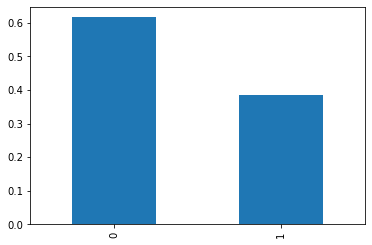

In [15]:
df[target_col].value_counts(normalize = True).plot(kind = 'bar') # Gráfico de barras 

Observamos que el porcentaje de supervivientes es del 38%. Esto implica que la distribución del target está **balanceada**. 

Antes de pasar al análisis estadístico univariante, por conveniencia nos guardamos los nombres de las variables en tres listas: una con los campos identificadores, una con las variables numéricas y otra con las variables categóricas.

In [16]:
id_cols = ['PassengerId', 'Name']
print("ID variables: ", id_cols)

ID variables:  ['PassengerId', 'Name']


In [17]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist() 
# Variables numéricas excluyendo target_col 
numeric_cols = [c for c in numeric_cols if c != target_col] # List comprehension
print("Numerical variables: ", numeric_cols)

Numerical variables:  ['Age', 'SibSp', 'Parch', 'Fare']


In [18]:
categoric_cols = df.select_dtypes(include=['object']).columns.tolist()
# Variables categóricas excluyendo id_cols 
categoric_cols = [c for c in categoric_cols if c not in id_cols] # List comprehension
print("Categorial variables: ", categoric_cols)

Categorial variables:  ['Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']


<a id='seccion2'></a>
## 2. Análisis estadístico inicial

### 2.1 Univariante

#### 2.1.1 Variables numéricas

En primer lugar, veamos un resumen estadístico de las variables numéricas.

In [19]:
df.describe()

,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


Para mayor profundidad, podemos visualizar la distribución de las variables numéricas mediante **histogramas** y **boxplots**.

In [20]:
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [15, 5] # Se define tamaño de gráfico por cuestiones estéticas

In [21]:
def plot_histogram_and_boxplot(df, column_name):
    """Plots the histogram and boxplot of a numerical variable. 

    Parameters:
    column_name (str): Numeric variable's name

    Returns:
    None
    """
    # Remove nulls in variable 
    df_ = df.loc[df[column_name].notnull()]
    
    fig = plt.figure()
    fig.suptitle(column_name, fontsize=16)
    fig.subplots_adjust(wspace = 0.3)
    
    ax1 = fig.add_subplot(121)
    ax1.set_title("histogram")
    ax1.hist(df_[column_name], bins = 25)
    
    ax2 = fig.add_subplot(122)
    ax2.set_title("boxplot")
    ax2.boxplot(df_[column_name], vert = False)

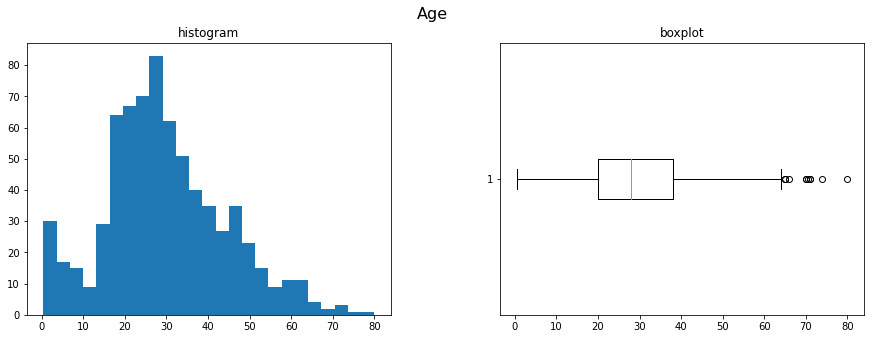

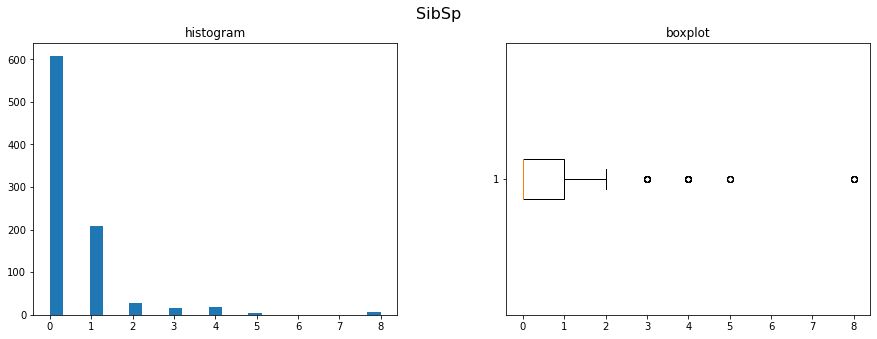

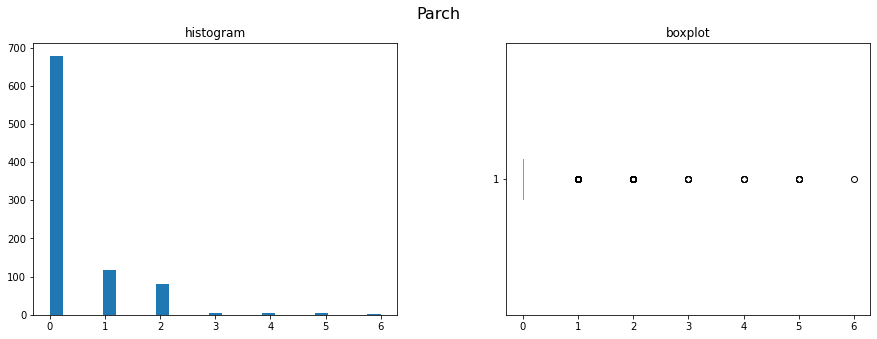

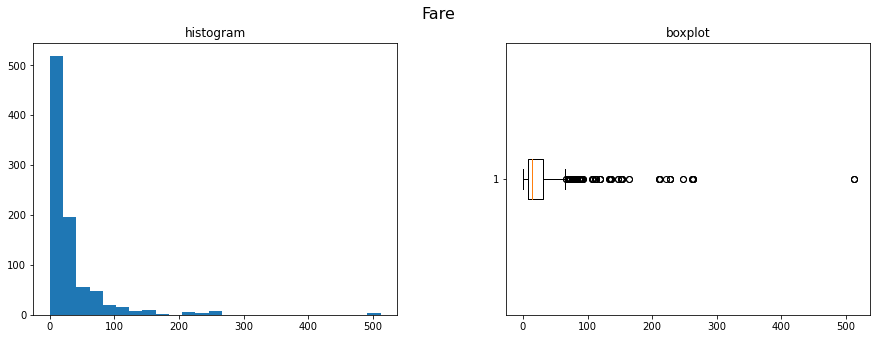

In [22]:
for c in numeric_cols:
    plot_histogram_and_boxplot(df = df, column_name = c)

#### 2.1.2 Variables categóricas

A continuación veamos la distribución de las variables categóricas mediante **gráficos de barra**.

In [23]:
def plot_barplot(df, column_name):
    """Plots the barplot of a categorical variable. 

    Parameters:
    column_name (str): Categorical variable's name

    Returns:
    None
    """ 
    fig = plt.figure()
    fig.suptitle(column_name, fontsize=16)
    df[column_name].value_counts().plot(kind = 'bar')

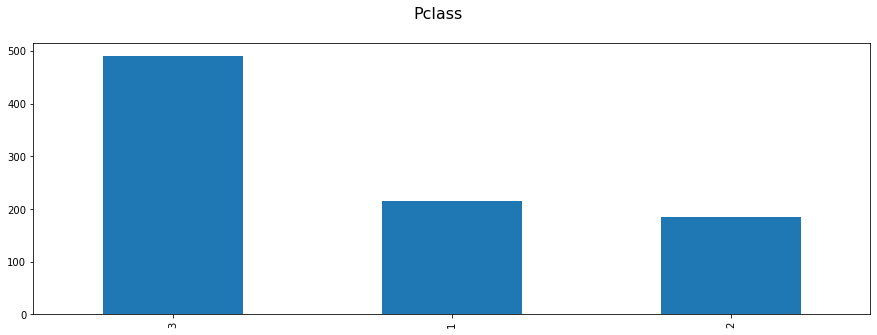

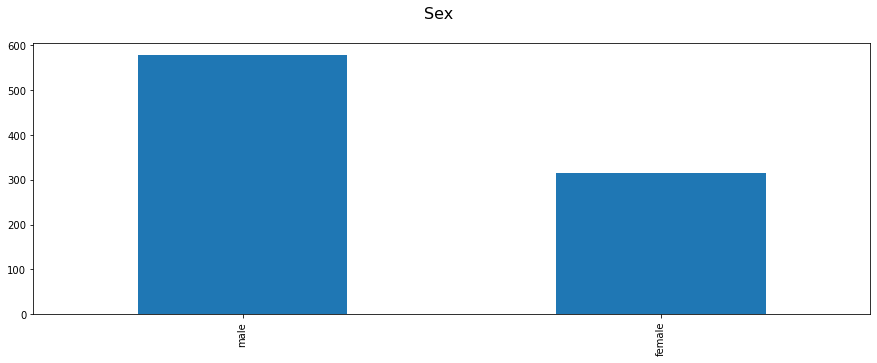

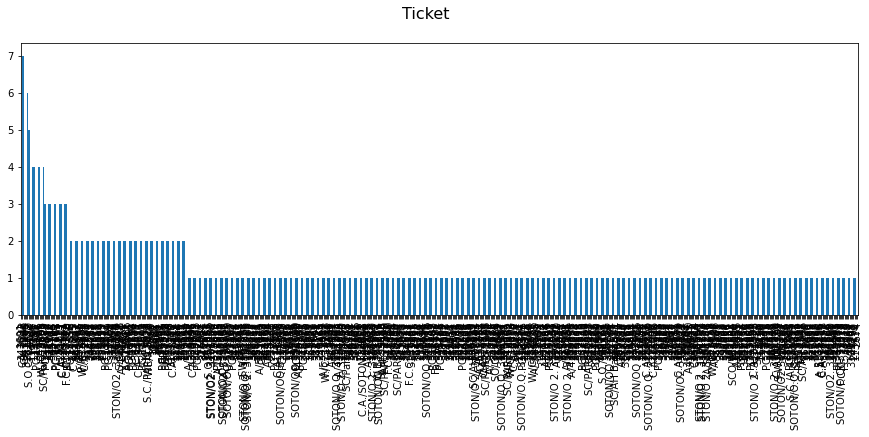

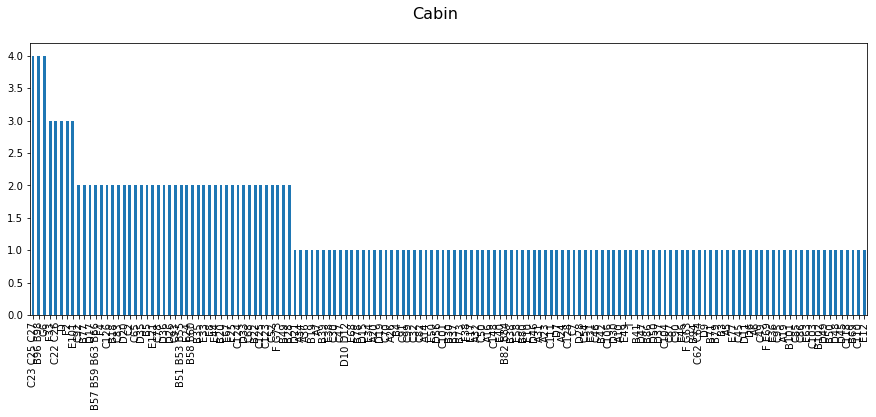

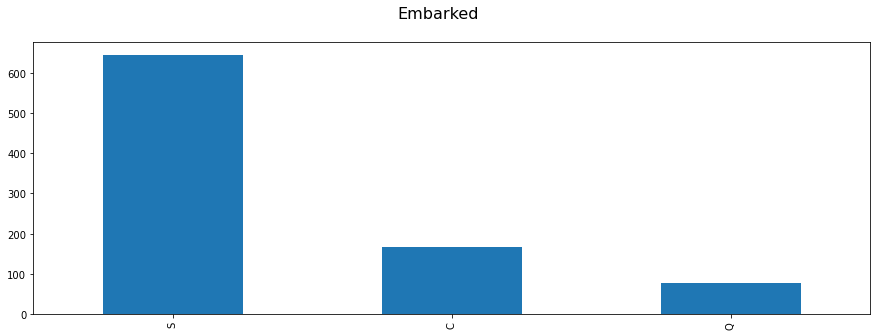

In [24]:
for c in categoric_cols:
    plot_barplot(df, column_name = c)

In [2]:
!pip install ydata-profiling

  Obtaining dependency information for ydata-profiling from https://files.pythonhosted.org/packages/c6/12/a869b9f81c992a179a27d76154b3ae3c1a65a43c9ec117437762093a75ca/ydata_profiling-4.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pydantic>=2 from https://files.pythonhosted.org/packages/0a/2b/64066de1c4cf3d4ed623beeb3bbf3f8d0cc26661f1e7d180ec5eb66b75a5/pydantic-2.5.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/65.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/65.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/65.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/65.2 kB ? eta -:--:--
     ------------------------- -------------- 41.0/65.2 kB ? eta -:--:--
     ------------------------- -------------- 41.0/65.2 kB ? eta -:--:--
     ----------------------------------- -- 61.4/65.2 kB 550.5 kB/s eta 0:00:01
     -------------------------------------- 65.2/65.2 kB 439.7 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.3 requires pydantic<2.0, but you have pydantic 2.5.2 which is incompatible.


In [3]:
!pip install -U ydata-profiling

### 2.2 Bivariante

Además de conocer la distribución de las variables explicativas, es importante analizar si esta cambia en función de la variable objetivo y existe, por tanto, cierta relación de dependencia. 

#### 2.2.1 Variables numéricas

In [25]:
import seaborn as sns

def plot_histogram_by_target(df, input_name, target_name):
    """Plots the histogram and boxplot of a numerical variable by target

    Parameters:
    input_name (str): Numeric variable's name
    target_name (str): Target variable's name

    Returns:
    None
    """
    fig = plt.figure()
    fig.suptitle(input_name, fontsize=16)
    ax1 = fig.add_subplot(121)
    sns.histplot(data=df, x=input_name, hue=target_name, alpha=.5, bins=25, ax=ax1)
    
    ax2 = fig.add_subplot(122)
    sns.boxplot(data=df, x=target_name, y=input_name, ax=ax2)

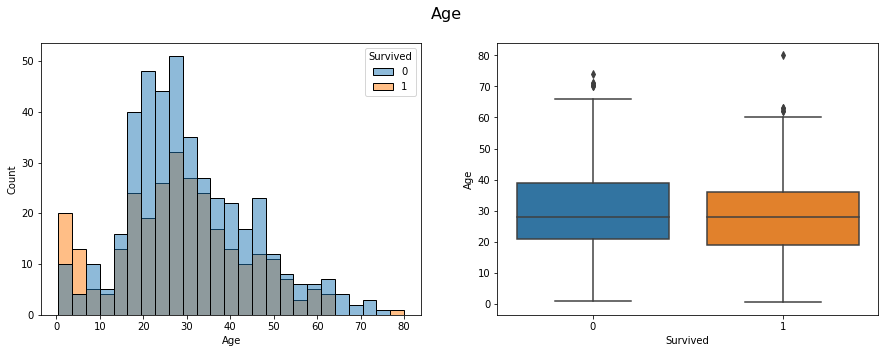

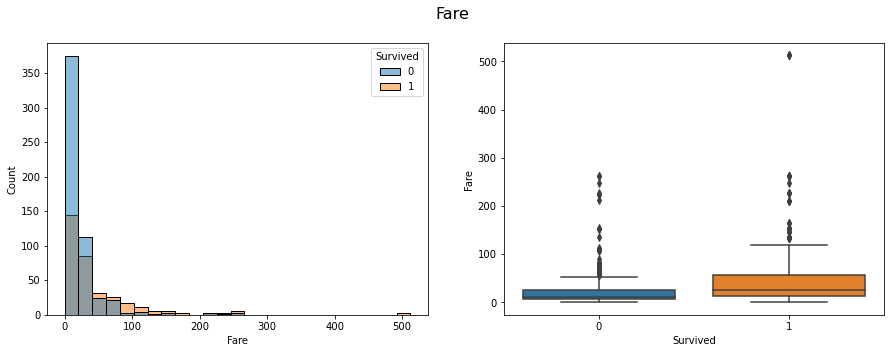

In [26]:
for c in ['Age', 'Fare']:
    plot_histogram_by_target(df = df, input_name = c, target_name = 'Survived')

#### 2.2.2 Variables categóricas

In [27]:
def plot_barplot_by_target(df, input_name, target_name, stacked = False):
    """Plots the barplot of a categorical variable by target. 

    Parameters:
    input_name (str): Categorical variable's name
    target_name (str): Target variable's name

    Returns:
    None
    """ 
    fig = plt.figure()
    pd.crosstab(df[input_name], df[target_name]).plot(kind = 'bar', rot = 0, stacked = stacked)

<Figure size 1080x360 with 0 Axes>

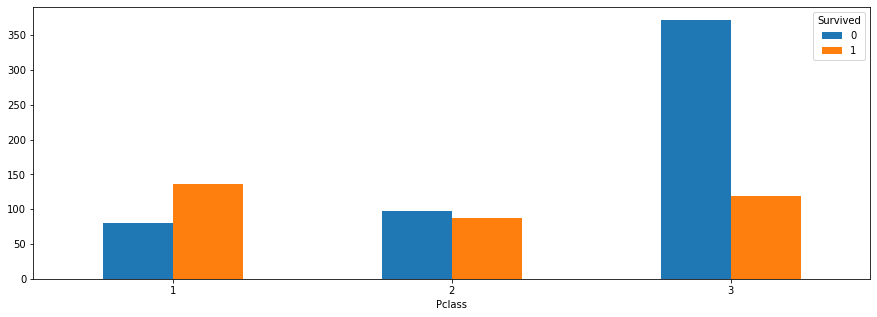

<Figure size 1080x360 with 0 Axes>

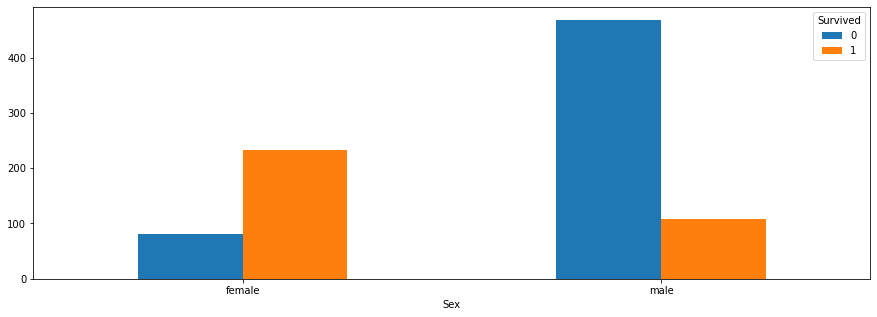

<Figure size 1080x360 with 0 Axes>

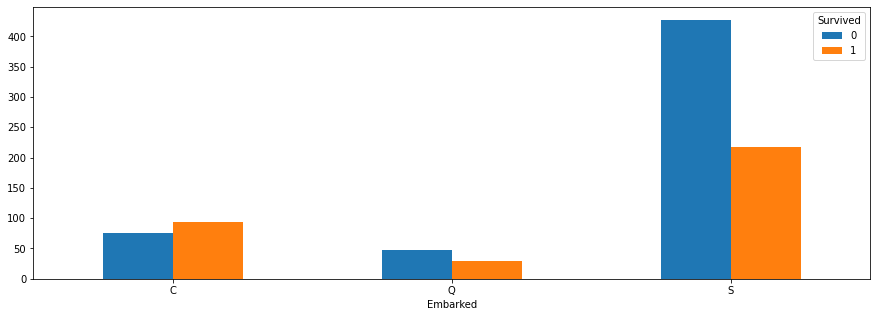

<Figure size 1080x360 with 0 Axes>

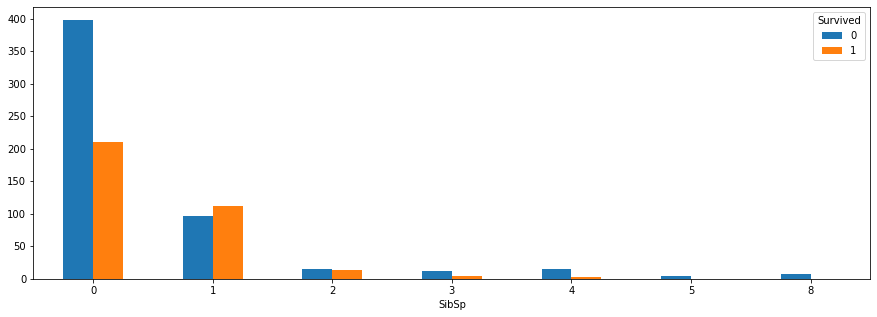

<Figure size 1080x360 with 0 Axes>

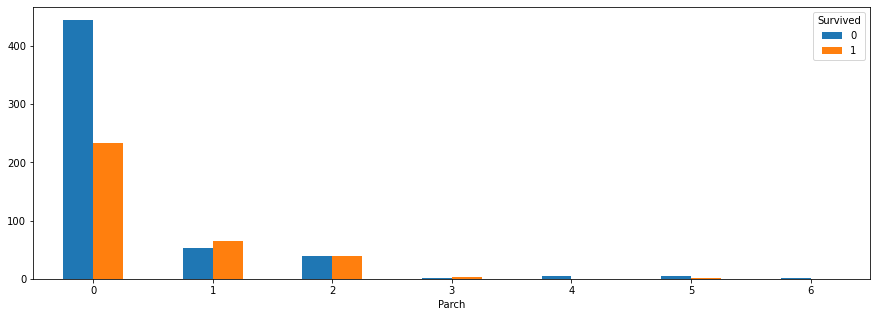

In [28]:
for c in categoric_cols + ['SibSp', 'Parch']:
    if c not in ['Cabin', 'Ticket']: # No pintamos estas variables, por su alta cardinalidad
        plot_barplot_by_target(df = df, input_name = c, target_name = 'Survived')

<a id='seccion3'></a>
## 3. Limpieza de datos

### 3.1 Eliminación de duplicados

Siempre es importante comprobar si hay filas duplicadas, bien exactamente iguales (lo que puede deberse a errores en la carga de datos) o bien para un subconjunto de campos (nos puede hacer replantear nuestra interpretación de los datos). 

In [29]:
len(df.drop_duplicates()) / len(df) # Comprobamos si hay filas duplicadas 

1.0

Esto implica que no hay filas duplicadas, lo cual ya esperabamos porque habíamos comprobado que la asociación entre observación del dataframe y pasajero es unívoca a través del campo *PassengerId*. Sin embargo, si por ejemplo restringimos la comprobación al campo *Name*: ¿existirán filas duplicadas? En principio el campo debería tomar valores únicos.

In [30]:
len(df.drop_duplicates(subset = ['Name'])) / len(df) 
# En efecto, tampoco hay filas duplicadas respecto del campo Name

1.0

En este caso, concluimos que el dataset no parece tener errores y además que lo hemos interpretado correctamente.

### 3.2 Imputación de valores ausentes 

Veamos qué variables tienen valores ausentes (**missings**) y, en caso afirmativo, cuántos tienen:

In [31]:
nulls_per_variable = df.isnull().sum() # Utilizamos el método de pandas isna() o isnull()
nulls_per_variable

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

El enfoque más intuitivo es imputar los nulos mediante los mejores estimadores a priori de la variable: en el caso de variables numéricas, la **media** o la **mediana**, y en el caso de variables categóricas, la **moda**. Sin embargo, este enfoque tiene un gran defecto, y es que rompe las correlaciones entre las variables, lo que en la práctica lo hace inútil. Por tanto, vamos a aplicar otro método, menos intuitivo pero efectivo, que consiste en asignar a las variables numéricas un valor fuera de rango y a las categóricas una nueva categoría.

- Variables categóricas con nulos: *Cabin* y *Embarked*

In [32]:
df['Embarked'].value_counts() 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
# Para imputar los nulos de una variable con pandas, existe el método fillna()
df['Embarked'].fillna(
    'UNKNOWN', # Imputamos con una nueva clase que llamamos 'UNKNOWN'
    inplace = True # Inplace = True realiza el cambio en el dataframe directamente
)  
df['Embarked'].value_counts() 

S          644
C          168
Q           77
UNKNOWN      2
Name: Embarked, dtype: int64

In [34]:
df.Cabin.value_counts() 

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
C22 C26        3
              ..
D45            1
C118           1
B69            1
C110           1
E12            1
Name: Cabin, Length: 147, dtype: int64

In [35]:
df.Cabin.fillna(
    'UNKNOWN',
    inplace = True 
)  
df.Cabin.value_counts() 

UNKNOWN        687
C23 C25 C27      4
B96 B98          4
G6               4
F33              3
              ... 
D45              1
C118             1
B69              1
C110             1
E12              1
Name: Cabin, Length: 148, dtype: int64

- Variables numéricas con nulos: *Age*

In [36]:
df[['Age']].min() # Valor mínimo de Age
# Confirmamos que la edad siempre toma valores positivos, 
# por lo podemos imputar los nulos por un valor fuera de rango: -1, por ejemplo 

Age    0.42
dtype: float64

In [37]:
df['Age'].fillna(-1, inplace = True)
df[['Age']].min()

Age   -1.0
dtype: float64

Comprobamos que la imputación se ha hecho bien en las tres variables

In [38]:
nulls_per_variable = df.isna().sum() 
nulls_per_variable

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<a id='seccion4'></a>
## 4. Feature engineering

Con el dataset correctamente limpiado, es habitual proponerse la obtención de nuevas variables a partir de las ya existentes, con la idea de ayudar al modelo a mejorar su rendimiento predictivo.

En este caso, vamos a crear 3 variables adicionales:

- Pasajero acompañado
- Planta de cabina 
- Título del pasajero


### 4.1 Pasajero acompañado

Puede que viajar con 1, 2, o más familiares no sea relevante, sino el simple hecho de viajar sólo o acompañado.

In [39]:
# Usamos una comparación booleana para indicar si el pasajero iba sólo o acompañado
df['WithFamily'] = ((df['SibSp'] > 0) | (df['Parch'] > 0)).astype(int)
df['WithFamily'].head()

0    1
1    1
2    0
3    1
4    0
Name: WithFamily, dtype: int64

<Figure size 1080x360 with 0 Axes>

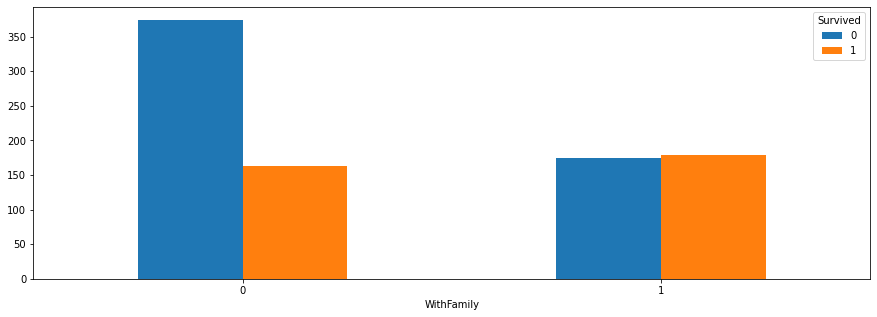

In [40]:
# Veamos su distribución bivariante respecto del target
plot_barplot_by_target(df, "WithFamily", target_col)

### 4.2 Sección de cabina

En la siguiente foto podemos ver la organización de las cabinas del barco:

In [41]:
from IPython.display import Image
Image(
    url= "https://upload.wikimedia.org/wikipedia/commons/0/0d/Olympic_%26_Titanic_cutaway_diagram.png",
    width = 500,
    height = 500
)

Observamos que las plantas se ordenan de la A (la superior) a la G (la inferior). Los pasajeros de las plantas inferiores tuvieron menos probabilidad de sobrevivir, ya quefueron las que primero se inundaron. Adicionalmente, la planta de la cabina correla con la clase social del pasajero, por lo que en definitiva incorporar esta información al modelo puede enriquecer su capacidad discriminativa. Ahora bien: ¿podemos encontrar esta información en la variable *Cabin*?

In [42]:
df['Cabin'].unique() # Valores únicos de la variable

array(['UNKNOWN', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

En efecto, vemos que, en general, las cabinas se identifican por una letra (planta) y número (¿sección del barco?), por ejemplo 'C85'. En algunos casos tenemos una combinación de varias, por ejemplo: 'B51 B53 B55', lo que quizá se interpreta como cabinas conectadas entre sí. En cualquier caso, nos vamos a limitar a extraer la planta de la cabina. ¿Cómo podemos hacerlo?

In [43]:
cabin_1 = 'C85'
cabin_2 = 'B51 B53 B55'

In [44]:
# 1. Separamos la cadena de texto con delimitador " ", obteniendo una lista
print(cabin_1.split(" "))
print(cabin_2.split(" "))

['C85']
['B51', 'B53', 'B55']


In [45]:
# 2. Nos quedamos con, por ejemplo, el primer elemento de la lista:
print(cabin_1.split(" ")[0])
print(cabin_2.split(" ")[0])

C85
B51


In [46]:
# 3. Para obtener la letra, seleccionamos el caracter en la posición 0
print(cabin_1.split(" ")[0][0])
print(cabin_2.split(" ")[0][0])

C
B


In [47]:
# Ahora, lo aplicamos sobre la variable con el método .apply() 
df["CabinFloor"] = df["Cabin"].apply(lambda cabin: cabin.split(" ")[0][0] if cabin != 'UNKNOWN' else cabin)
df["CabinFloor"].unique()

array(['UNKNOWN', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

<Figure size 1080x360 with 0 Axes>

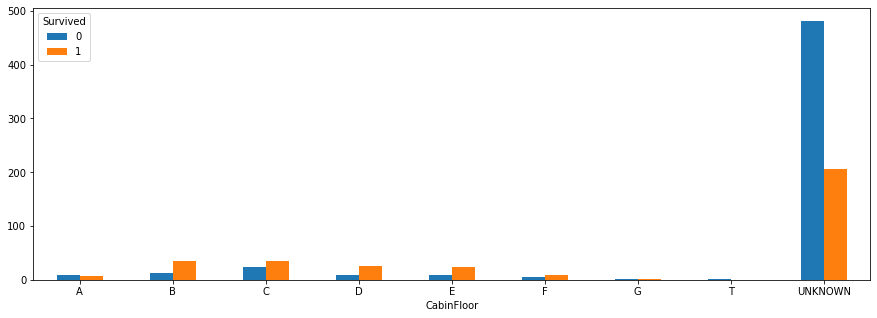

In [48]:
# Veamos su distribución bivariante respecto del target
plot_barplot_by_target(df, "CabinFloor", target_col)

### 4.3 Título de la persona

Parece razonable suponer que la gente de clase alta tuvo más "facilidades" para sobrevivir que la gente de clase baja, por lo cual es interesante introducir en el modelo el título del pasajero. Para ello, vamos a trabajar sobre el campo *Name*. Cada uno de los nombres tiene la siguiente estructura: 'Apellido, Titulo. Nombre'. Así, ¿cómo obtenemos el titulo?

In [49]:
name = 'Apellido, Titulo. Nombre'

In [50]:
# 1. Separamos la cadena de texto con delimitador ",", obteniendo una lista
name.split(",")

['Apellido', ' Titulo. Nombre']

In [51]:
# 2. Nos quedamos con el segundo elemento de la lista:
name.split(",")[1]

' Titulo. Nombre'

In [52]:
# 3. Separamos la cadena de texto con delimitador ".", obteniendo una lista
name.split(",")[1].split(".")

[' Titulo', ' Nombre']

In [53]:
# 4. Nos quedamos con el primer elemento de la lista:
name.split(",")[1].split(".")[0]

' Titulo'

In [54]:
# 5. Eliminamos los espacios en blanco 
name.split(",")[1].split(".")[0].strip()

'Titulo'

In [55]:
# Ahora, lo aplicamos sobre la variable con el método .apply() 
df["Title"] = df["Name"].apply(lambda name: name.split(",")[1].split(".")[0].strip())
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

<Figure size 1080x360 with 0 Axes>

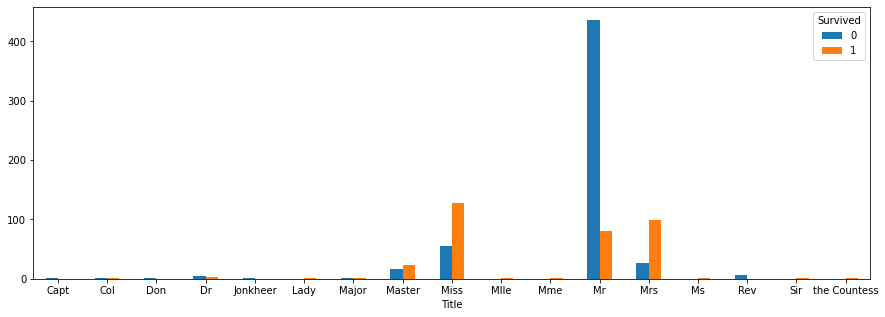

In [56]:
# Veamos su distribución bivariante respecto del target
plot_barplot_by_target(df, "Title", target_col)

<a id='seccion5'></a>
## 5. Categorical encoding

Las variables categóricas no pueden ser introducidas directamente en el modelo. Previamente, han de ser codificadas numéricamente. Para ello, existen varios métodos posibles, siendo el más habitual el **One Hot Encoding** (OHE). Con este método, si tenemos una variable categórica con N clases, pasamos a tener N variables binarias, las cuales tomarán el valor 1 o 0 en función de la clase de la observación asociada.

Ejemplo:

Supongamos que tenemos la siguiente variable:

|*index*|color|
|---|---|
|*1*|rojo|
|*2*|azul|
|*3*|verde|
|*4*|azul|
|*5*|verde|
|...|...|

Si codificamos dicha variable mediante el OHE, obtendríamos lo siguiente:
 
|*index*|color_rojo|color_azul|color_verde|
|---|---|---|---|
|*1*|1|0|0|  
|*2*|0|1|0| 
|*3*|0|0|1| 
|*4*|0|1|0| 
|*5*|0|0|1| 
|...|...|...|...|

In [57]:
# En este punto, vamos a seguir trabajando sobre una copia del dataframe df, 
# por si  quisieramos volver a este punto en algún momento
df_2 = df.copy()

In [58]:
# Podemos aplicar el OHE en pandas con la función get_dummies()
# Por defecto, directamente se aplica sobre todas las columnas categóricas, lo cual no nos interesa (ej: PassengerId)
# Podemos especificarle el nombre de las columnas sobre las cuales queremos aplicarlo con el argumento 'columns'

# Revisemos qué columnas categóricas tenemos ahora mismo:
print(df_2.select_dtypes(include = 'object').columns.tolist())

['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'CabinFloor', 'Title']


In [59]:
# Recordemos que al haber realizado el feature engineering hay ciertas variables que podemos eliminar: Name y Cabin
df_2.drop(columns = ['Name', 'Cabin'], inplace = True)
print(df_2.select_dtypes(include = 'object').columns.tolist())

['PassengerId', 'Pclass', 'Sex', 'Ticket', 'Embarked', 'CabinFloor', 'Title']


In [60]:
# La variable Ticket también la podemos eliminar, porque no parece aportar mucha información
print("Ejemplo de valores de Ticket:\n", df['Ticket'].unique()[1:30])
df_2.drop(columns = ['Ticket'], inplace = True)

Ejemplo de valores de Ticket:
 ['PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877' '17463' '349909'
 '347742' '237736' 'PP 9549' '113783' 'A/5. 2151' '347082' '350406'
 '248706' '382652' '244373' '345763' '2649' '239865' '248698' '330923'
 '113788' '347077' '2631' '19950' '330959' '349216' 'PC 17601']


In [61]:
# Realizamos el OHE 
print("Número de variables antes del OHE:", df_2.shape[1])
df_2 = pd.get_dummies(df_2, columns = ['Pclass', 'Sex', 'Embarked', 'CabinFloor', 'Title'])
print("Número de variables después del OHE:", df_2.shape[1])
df_2.head()

Número de variables antes del OHE: 12
Número de variables después del OHE: 42


,PassengerId,Survived,Age,SibSp,Parch,Fare,WithFamily,Pclass_1,Pclass_2,Pclass_3,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,1,0,22.0,1,0,7.2500,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,2,1,38.0,1,0,71.2833,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,4,1,35.0,1,0,53.1000,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,0,35.0,0,0,8.0500,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [62]:
# Comprobamos que la única variable categórica que queda es PassengerId
print(df_2.select_dtypes(include = 'object').columns.tolist())

['PassengerId']


<a id='seccion6'></a>
## 6. Análisis estadístico final

Tras el proceso de limpieza de datos, feature enginnering y codificación de variables categóricas, podemos analizar las relaciones entre todas las variables, poniendo foco en sus posibles interacciones con la variable objetivo.

### 6.1 Correlación lineal

Vamos a analizar la **correlación lineal** entre todas las variables. Es importante no sólo fijarse en las correlaciones entre las variables explicativas y la variable target, sino entre las mismas variables explicativas, ya que:

1. Si dos variables explicativas están altamente correladas, podemos prescindir de una de las dos, puesto que aportan información muy parecida.
2. En el caso de realizar un análisis de regresión lineal, estaríamos ante un [problema de multicolinealidad](https://support.minitab.com/es-mx/minitab/18/help-and-how-to/modeling-statistics/regression/supporting-topics/model-assumptions/multicollinearity-in-regression/), que compromete seriamente la robustez de la estimación de los coeficientes de la recta.

Para visualizar la correlación, es habitual utilizar un mapa de calor. Podemos hacerlo mediante la librería de visualización seaborn, complementaria a matplotlib.

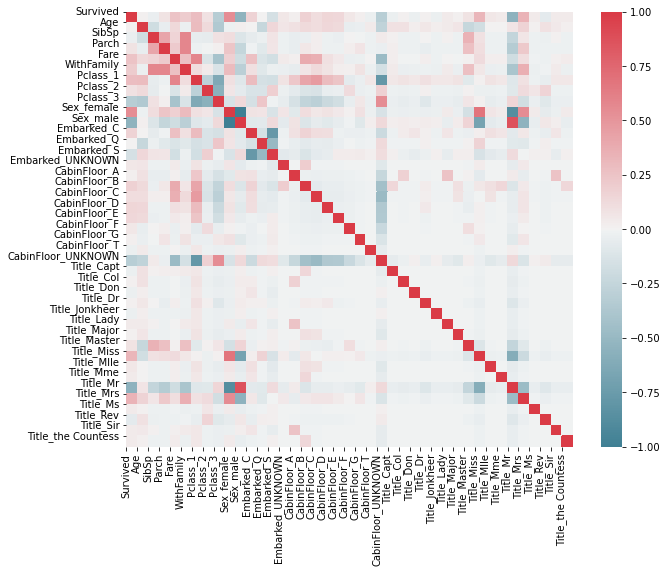

In [63]:
corr = df_2.corr()
fig, _ = plt.subplots(figsize=(10, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap = colormap)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

<a id='seccion7'></a>
## 7. Entrenamiento del modelo

¿A qué tipo de problema de Machine Learning nos enfrentamos? Como queremos predecir la variable target *Survived*, que es binaria, se trata de un problema de clasificación binaria.

### 7.1 Partición en train / test
Con el problema bien definido, podemos utilizar la metodología de modelización usual en estos casos. Lo primero que debemos realizar es la división del dataset en dos conjuntos: uno, el de **train**, con el que entrenaremos los modelos y otro, el de **test**, con el cual los validaremos, evaluando su capacidad de generalización a datos no vistos durante el entrenamiento. 

In [64]:
# Carga de la función 'train_test_split' del módulo model_selection de scikit-learn
from sklearn.model_selection import train_test_split

X = df_2.drop(columns = ['PassengerId', 'Survived']) # Matriz de inputs
y = df_2[target_col]

# Partición en train/test con un porcentaje de test del 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 123)

# Número de registros del dataset de train y de test
print("Número de observaciones")
print("- Train: ", X_train.shape[0])
print("- Test:  ", X_test.shape[0])

Número de observaciones
- Train:  596
- Test:   295


### 7.2 Entrenamiento 

A continuación, vamos a construir los modelos con los conjuntos de train que acabamos de obtener. Este proceso se conoce como **entrenamiento**, y se trata de un proceso de estimación de los parámetros del modelo mediante la optimización de una **función de coste**. En Machine Learning, es habitual utilizar las dos siguientes funciones de coste:

- **Problemas de regresión**: [mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) 
- **Problemas de clasificación**: [cross entropy](https://en.wikipedia.org/wiki/Cross_entropy)

Hay múltiples modelos implementados en scikit-learn:

- [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)
- [Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)
- [Decision Tree](https://en.wikipedia.org/wiki/Decision_tree)
- [K-Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
- [Random Forest](https://es.wikipedia.org/wiki/Random_forest)
- [SVM](https://en.wikipedia.org/wiki/Support-vector_machine)
- [Gradient Boosted Trees](https://en.wikipedia.org/wiki/Gradient_boosting)

En nuestro caso vamos a utilizar un Árbol de Decisión, puesto que es un modelo fácilmente interpretable. No obstante, en general lo que se hace es lanzar una batería de modelos y comparar sus métricas para seleccionar uno, ya que, aunque a priori unos modelos sean más potentes que otros, no tenemos garantizado que funcionen mejor en todas las situaciones ([no free lunch](https://en.wikipedia.org/wiki/No_free_lunch_theorem)).



In [65]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 10) # Instanciación del modelo con máxima profundidad de 10
clf.get_params() # Hiperparámetros del modelo

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [66]:
# Entrenamiento del modelo
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [67]:
# Obtención de predicciones sobre test
y_pred = clf.predict(X_test)
print("Predicciones:", y_pred[0:20])
print("Datos reales:", y_test[0:20].values)

Predicciones: [1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0]
Datos reales: [1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0]


In [68]:
# Evaluación de la precisión del modelo
success = (y_pred == y_test)
print("Número de aciertos:", success.sum())
print("Total de predicciones:", len(success))
print("Ratio de acierto (Número de aciertos / Total de predicciones):", success.mean().round(2))

Número de aciertos: 238
Total de predicciones: 295
Ratio de acierto (Número de aciertos / Total de predicciones): 0.81


In [69]:
from sklearn import metrics 
metrics.accuracy_score(y_test, y_pred).round(2) # También lo podemos obtener con scikit-learn

0.81

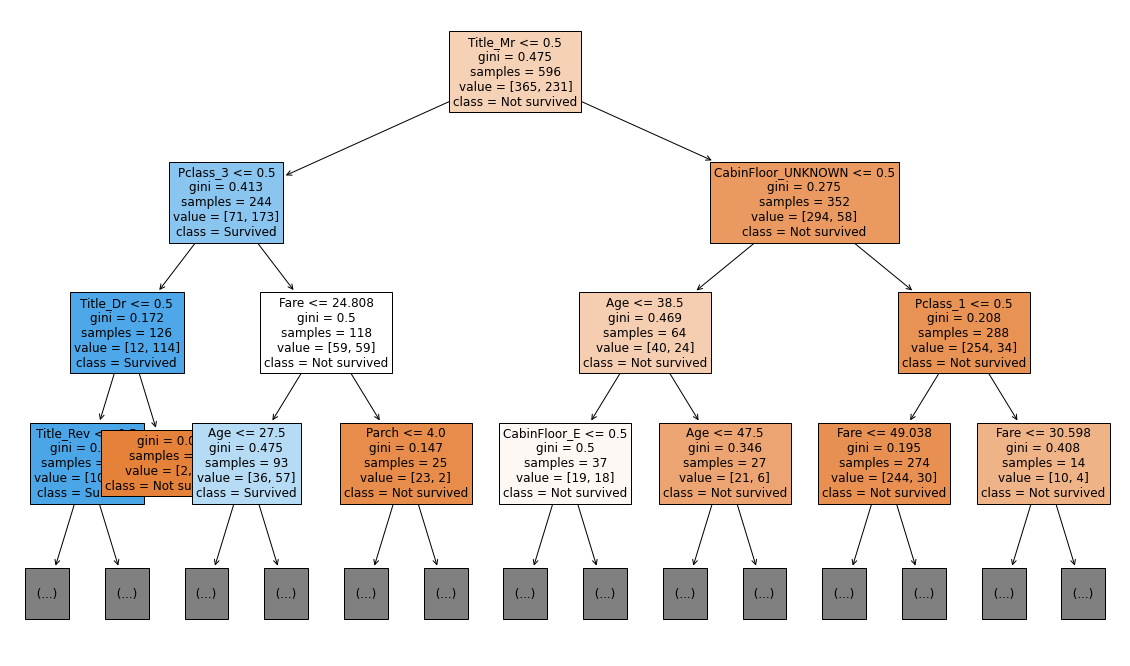

In [70]:
from sklearn.tree import plot_tree

# Visualización del árbol de decisión
fig = plt.figure(figsize=(20, 12))
plot_tree(
    clf, 
    max_depth = 3, 
    filled = True, 
    class_names = ["Not survived", "Survived"],
    feature_names = X.columns,
    fontsize = 12
)
plt.show()

In [71]:
# Importancia de variables
df_importances = pd.DataFrame(data = {
    'variable': X.columns, 
    'importance': clf.feature_importances_
})
df_importances.sort_values('importance', ascending = False, inplace = True)
df_importances.reset_index(drop = True, inplace = True)
df_importances.head()

,variable,importance
0,Title_Mr,0.379466
1,Fare,0.223569
2,Age,0.127927
3,Pclass_3,0.092559
4,CabinFloor_UNKNOWN,0.032215


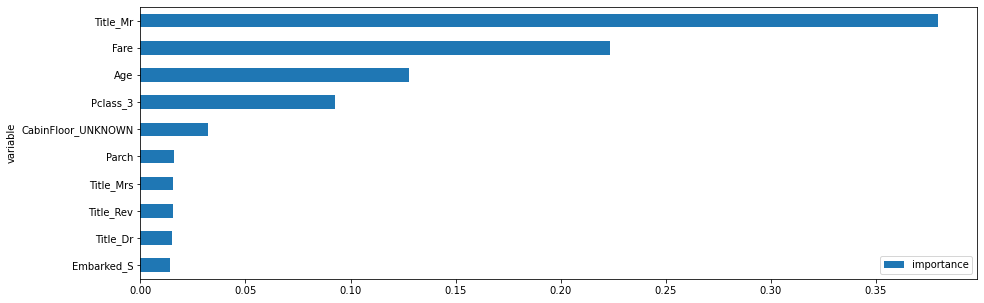

In [72]:
# Visualizamos las n_features más importantes
n_features = 10
df_importances.iloc[:n_features][::-1].plot(x = 'variable', y = 'importance', kind = 'barh')
plt.show()

<a id='seccion8'></a>
## 8. Validación del modelo

La validación en Machine Learning es sumamente importante, puesto que es la manera de conocer si los patrones aprendidos por nuestros modelos a la hora de predecir una variable son extrapolables a otros datos a los cuales el modelo no haya tenido acceso. Esta capacidad de generalización es lo que se persigue, puesto de nada sirve obtener. un modelo preciso sobre los datos de entrenamiento pero extremadamente impreciso cuando se encuentre con datos nuevos sobre los cuales queremos inferir. A este fenómeno se le denomina **sobreajuste**, y puede ser por varios motivos:

1. El modelo está sobreparametrizado y es innecesariamente complejo
2. El proceso de entrenamiento, que es iterativo, se prolonga más allá de lo necesario 

Por tanto, es imprescindible testear los modelos entrenados con el conjunto de validación previamente obtenido. 

### 8.1 Evaluación con distintas métricas

Las principales métricas que se manejan en problemas de clasificación son las siguientes:

- **Recall**: de todos los datos de la clase de de interés (1), qué porcentaje estoy prediciendo correctamente
- **Precision**: de todos los datos que mi modelo predice como 1s, qué porcentaje son efectivamente 1s
- **F1 Score**: compromiso entre recall y precision mediante su media armónica
- **Accuracy**: porcentaje de acierto total (1s y 0s) del modelo
- **Especificidad**: de todos los datos de la clase 0, qué porcentaje estoy prediciendo correctamente

Estas medidas se pueden calcular fácilmente a partir de la **matriz de confusión** del modelo para cierto umbral de probabilidad. Dicha matriz consiste en una tabla de doble entrada con dos filas y dos columnas, enfrentando el número de datos reales con los predichos por el modelo:

|Predicción \ Real|**1**|**0**|
|---|---|---|
|**1**|Verdaderos Positivos (**TP**)| Falsos Positivos (**FP**)|
|**0**|Falsos Negativos (**FN**)| Verdaderos Negativos (**TN**)|

Así, las métricas anteriores se obtienen de la siguiente manera:

$$Recall = \frac{TP}{TP + FN}$$

$$Precision = \frac{TP}{TP + FP}$$

$$F1\space Score = 2 * \frac{Recall * Precision}{Recall + Precision}$$

$$Accuracy = \frac{TP+TN}{TP+FP+FN+TN}$$

$$Especificidad = \frac{TN}{TN + FP}$$

Véase que el recall es el ratio de verdaderos positivos (**TPR**), y la especificidad el ratio de verdaderos negativos (**TNR**).

In [73]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

y_pred_train = clf.predict(X_train) # Predicciones sobre train
y_pred_test = clf.predict(X_test) # Predicciones sobre test

d_metrics = {
    'accuracy': accuracy_score,
    'recall': recall_score,
    'precision': precision_score,
    'f1': f1_score
} # Diccionario con (clave, valor) = (nombre de métrica, métrica)

# Inicializamos output
d_output = dict()
d_output["train"] = list()
d_output["test"] = list()

# Iteramos sobre d_metrics
for metric_fun in d_metrics.values():
    d_output["train"].append(metric_fun(y_train, y_pred_train))
    d_output["test"].append(metric_fun(y_test, y_pred_test))

# Construimos dataframe
df_metrics = pd.DataFrame(d_output, index = d_metrics.keys())
df_metrics

,train,test
accuracy,0.936242,0.806780
recall,0.887446,0.720721
precision,0.944700,0.754717
f1,0.915179,0.737327


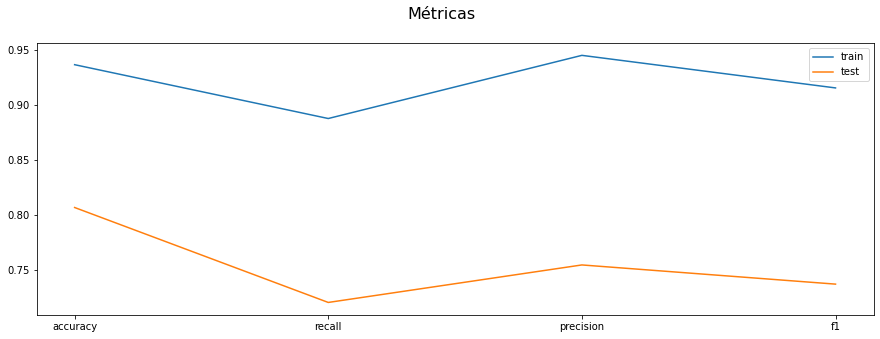

In [74]:
fig = plt.figure()
fig.suptitle("Métricas", fontsize=16)
ax1 = fig.add_subplot(111)
ax1.plot(df_metrics['train'], label = 'train')
ax1.plot(df_metrics['test'], label = 'test')
ax1.legend()

Las diferencias entre las métricas de train y sobre test nos dicen que existe sobreajuste.

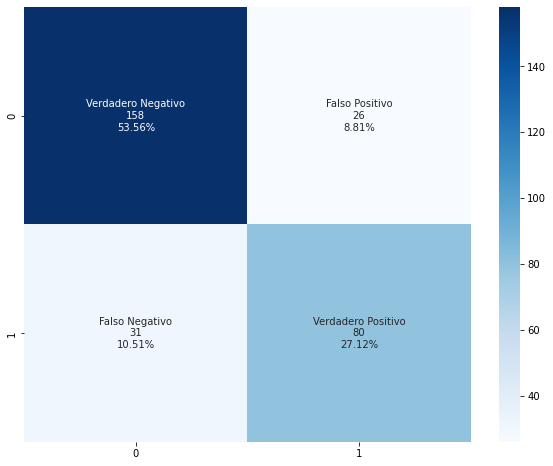

In [75]:
import numpy as np

def make_confusion_matrix(cm):
    """Plots the confusion matrix

    Parameters:
    cm (2x2. numpy.ndarray): Confusion matrix

    Returns:
    None
    """
    group_names = ["Verdadero Negativo", "Falso Positivo", "Falso Negativo", "Verdadero Positivo"]
    group_counts = [value for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    fig = plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

cm = metrics.confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm)

### 8.2 Capacidad discriminativa general del modelo

Vamos a obtener la probabilidad de supervivencia que asigna al modelo a cada pasajero.

In [76]:
# predict_proba devuelve las probabilidades de las dos clases, pero sólo nos interesa la clase 1 ([:,1])
y_proba = clf.predict_proba(X_test)[:,1]
print(y_proba[:10])

[1.         0.         0.57142857 0.         0.33333333 0.
 1.         0.93333333 0.33333333 1.        ]


Veamos ahora gráficamente las probabilidades que asigna el modelo tanto para los supervivientes como para los no supervivientes.

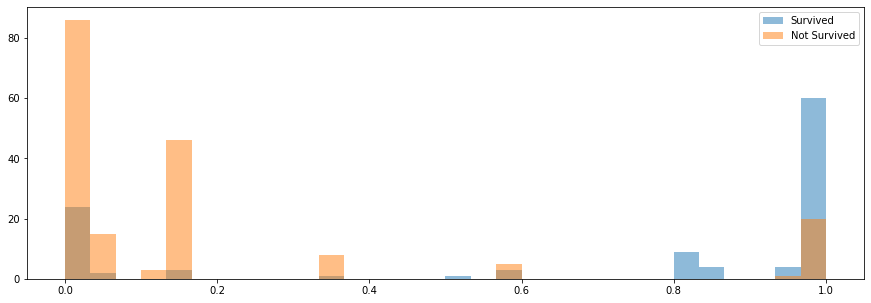

In [77]:
# y_proba[y_test == 1] me devuelve los valores de y_proba donde y_test vale 1, es decir, 
# me devuelve las probabilidades de los pasajeros supervivientes. De forma análoga, obtengo
# las probabilidades para los no supervivientes, especificando y_test == 0
plt.hist(y_proba[y_test == 1], bins = 30, alpha = 0.5, label = 'Survived')
plt.hist(y_proba[y_test == 0], bins = 30, alpha = 0.5, label = 'Not Survived')
plt.legend()
plt.show()    

Es importante incidir en que los modelos de clasificación devuelven, en general, una puntuación (**score**) entre 0 y 1, a la de forma general nos referimos como probabilidad. Sin embargo, esto no es del todo riguroso, ya que en general este score no cumple la noción estricta de probabilidad. En cualquier caso, este score nos brinda la capacidad de ordenar las observaciones y nos permite clasificar una observación como positiva (1) o negativa (0) utilizando un **umbral** u del siguiente modo: 

$${y_{proba} \ge u} \to y_{pred} = 1$$ 

El umbral por defecto es 0.5, aunque en general la selección del umbral 'óptimo' esta sujeta a la métrica particular en la que basarnos para evaluar la calidad del modelo. Sin embargo, se puede obtener una medida general de la calidad de un modelo para todos los umbrales mediante dos herramientas: 

- **Curva ROC**: enfrenta el recall frente al ratio de falsos positivos a medida que el umbral de probabilidad va descendiendo de 1 a 0
- **Curva Precision - Recall**: enfrenta la precision y el recall a medida que el umbral de probabilidad va descendiendo de 1 a 0

Ambas nos permiten determinar el modelo óptimo atendiendo de manera cualitativa a la forma de la curva, de modo que el modelo con una curva superior a las demás tiene mejor rendimiento que el resto. Para confirmarlo cuantitativamente, debemos obtener el área bajo la curva (**AUC**), y ver cuál es mayor.

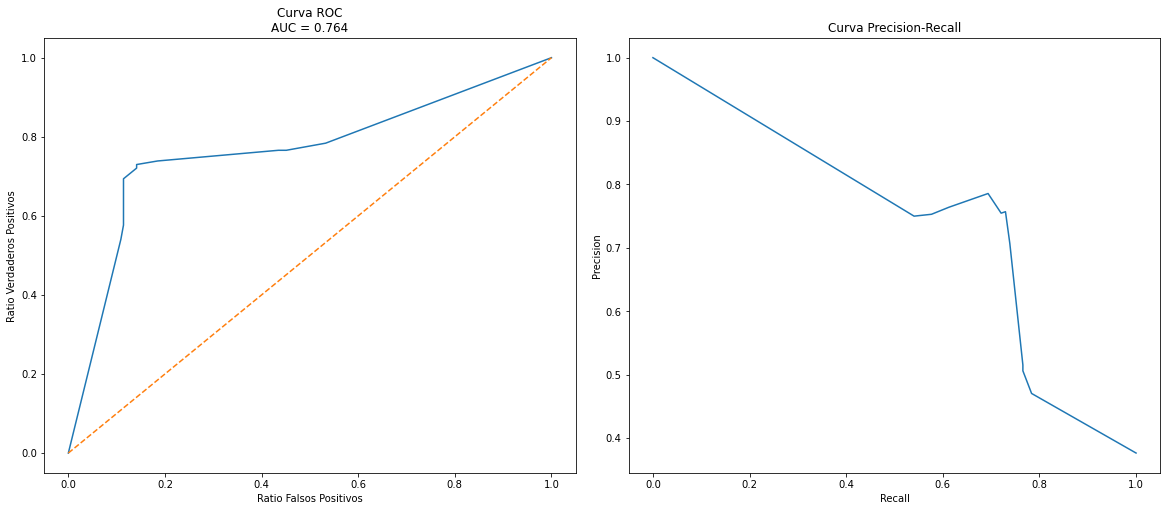

In [78]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.subplots_adjust(wspace = 0.1)

fpr, tpr, _ = metrics.roc_curve(y_test, y_proba) # ROC Curve
roc_auc = metrics.auc(fpr, tpr) # ROC AUC
ax1.plot(fpr, tpr)

ax1.set_title(f"Curva ROC\nAUC = {round(roc_auc, 3)}")
ax1.set_xlabel("Ratio Falsos Positivos")
ax1.set_ylabel("Ratio Verdaderos Positivos")


ax2.set_title("Curva Precision-Recall")
ax2.set_xlabel("Recall")
ax2.set_ylabel("Precision")

precision, recall, _ = metrics.precision_recall_curve(y_test, y_proba) # Curva PR
ax2.plot(recall, precision)

ax1.plot(np.linspace(0,1,len(fpr)), np.linspace(0,1,len(fpr)), '--')
plt.show()